<a href="https://colab.research.google.com/github/sambhajizambre/Project/blob/main/capstone_project2_bengaluru_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
import re
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS 
from warnings import filterwarnings
filterwarnings('ignore')

In [78]:
df=pd.read_csv('/content/drive/MyDrive/python/Bangalore_Cafe_Zomato.csv')
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
1,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NaN,NaN
2,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari
3,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,Cafes,Banashankari
4,Cafe Shuffle,Yes,Yes,4.2/5,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,Cafes,Banashankari
5,The Coffee Shack,Yes,Yes,4.2/5,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari
6,Caf-Eleven,No,No,4.0/5,424,Banashankari,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,Cafes,Banashankari
7,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Cafes,Banashankari
8,Cafe Vivacity,Yes,No,3.8/5,90,Banashankari,Cafe,"Garlic Bread, Burgers, Sandwiches, Pizza, Hot ...",Cafe,650,Cafes,Banashankari
9,Catch-up-ino,Yes,No,3.9/5,133,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800,Cafes,Banashankari


In [79]:
df.tail(10)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
4367,Cafe Coffee Day,Yes,No,3.6 /5,45,Whitefield,Cafe,"Sandwiches, Brownie",Cafe,650,Dine-out,Whitefield
4368,Fashion Knack Cafe,No,No,3.7 /5,18,Whitefield,Cafe,NaN,"Cafe, Burger, Sandwich",250,Dine-out,Whitefield
4369,Butterly Cafe,No,No,3.1 /5,14,Whitefield,Cafe,NaN,Cafe,550,Dine-out,Whitefield
4370,Spice Boulevard,No,No,3.9 /5,89,Whitefield,Cafe,"Sandwich, Pancakes, Garlic Bread, Coffee, Nach...","Cafe, Continental, Chinese",700,NaN,NaN
4371,The Waverly Express,No,No,3.5 /5,12,Whitefield,Cafe,NaN,Cafe,650,Dine-out,Whitefield
4372,Tata Cha,Yes,No,NEW,0,Whitefield,Cafe,NaN,"Cafe, Tea, North Indian",500,Dine-out,Whitefield
4373,Teashot,No,No,2.9 /5,24,Whitefield,Cafe,NaN,Cafe,150,Dine-out,Whitefield
4374,The Coffee Bean & Tea Leaf,Yes,No,3.0 /5,38,Whitefield,Cafe,NaN,"Cafe, Coffee",700,Dine-out,Whitefield
4375,Cafe Thulp,Yes,No,3.6 /5,57,"ITPL Main Road, Whitefield",Cafe,"Burgers, Pasta Alfredo, Pulled Pork Burger, Pizza","Cafe, Burger, Italian, Salad","1,000",Dine-out,Whitefield
4376,Re:fuel- Aloft Bengaluru Cessna Business Park,No,No,NaN,0,Bellandur,"Cafe, Bakery",NaN,"Bakery, Beverages, Cafe, Coffee, Desserts, San...","1,000",Dine-out,Whitefield


In [80]:
df.describe()

,votes
count,4377.000000
mean,436.056203
std,1100.397778
min,0.000000
25%,24.000000
50%,99.000000
75%,450.000000
max,14726.000000


In [81]:
df.shape

(4377, 12)

In [82]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                            251
votes                             0
location                          0
rest_type                         0
dish_liked                     1496
cuisines                          0
approx_cost(for two people)      45
listed_in(type)                 664
listed_in(city)                 664
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         4377 non-null   object
 1   online_order                 4377 non-null   object
 2   book_table                   4377 non-null   object
 3   rate                         4126 non-null   object
 4   votes                        4377 non-null   int64 
 5   location                     4377 non-null   object
 6   rest_type                    4377 non-null   object
 7   dish_liked                   2881 non-null   object
 8   cuisines                     4377 non-null   object
 9   approx_cost(for two people)  4332 non-null   object
 10  listed_in(type)              3713 non-null   object
 11  listed_in(city)              3713 non-null   object
dtypes: int64(1), object(11)
memory usage: 410.5+ KB


In [84]:
len(df['location'].unique())

64

In [85]:
locations=pd.DataFrame({"Name":df['location'].unique()})
locations.head(10)

,Name
0,Banashankari
1,Basavanagudi
2,Jayanagar
3,Kumaraswamy Layout
4,JP Nagar
5,Bannerghatta Road
6,BTM
7,Shanti Nagar
8,Richmond Road
9,Wilson Garden


In [86]:
df['cuisines'].unique()

array(['Cafe, Mexican, Italian', 'Cafe, Italian, Continental',
       'Cafe, Mexican, Italian, Momos, Beverages', 'Cafe',
       'Cafe, Chinese, Continental, Italian', 'Cafe, Continental',
       'Cafe, Fast Food, Continental, Chinese, Momos',
       'Chinese, Cafe, Italian', 'Cafe, Italian, American',
       'Cafe, French, North Indian', 'Cafe, Pizza, Fast Food, Beverages',
       'Cafe, Fast Food', 'Cafe, Bakery', 'Cafe, South Indian',
       'Cafe, Fast Food, Beverages', 'Cafe, Italian', 'Cafe, Beverages',
       'Cafe, Burger, Continental, Italian, Desserts',
       'Cafe, American, Pizza', 'Cafe, Continental, Beverages, Desserts',
       'Cafe, Fast Food, Chinese', 'Cafe, Continental, Fast Food',
       'Cafe, Italian, Pizza', 'Cafe, Italian, Beverages',
       'Cafe, Continental, Beverages',
       'Cafe, Fast Food, Chinese, Continental', 'Cafe, Bakery, Beverages',
       'Cafe, Healthy Food, Asian, Italian, North Indian, Biryani, Juices',
       'Cafe, Desserts', 'Cafe, North In

In [87]:
dfupd=df.copy()
dfupd['update_dish_liked']=dfupd['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
rest=dfupd['rest_type'].value_counts()[:9].index


In [88]:
dfupd.dropna(axis='index',subset=['rest_type'],inplace=True)
dfupd.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [89]:
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=dfupd[dfupd['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase 
            for i in range(len(words)): 
                words[i] = words[i].lower() 
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1200, height=1200).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")

In [90]:
df2=df.copy()
# df.isnull().sum()
# df.dropna(how='any',inplace=True)
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

In [91]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.')) 
df['cost'] = df['cost'].astype(float)
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df.shape

(4377, 12)

In [92]:
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes','rating'])]:
        data[column] = data[column].factorize()[0]
    return data

Zom_df = Encode(df.copy())
Zom_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,0,0,0,3.8/5,918,0,0,0,0,800.0,0,0
1,1,0,0,4.0/5,324,0,1,1,1,700.0,-1,-1
2,2,0,0,4.2/5,504,0,1,2,2,550.0,1,0
3,3,0,0,4.1/5,402,0,1,3,3,500.0,1,0
4,4,0,1,4.2/5,150,0,1,4,1,600.0,1,0


In [93]:
values = df['cuisines'].value_counts()[:20]
labels=values.index
text=values.index
fig = go.Figure(data=[go.Pie(values=values,labels=labels,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title="Most popular cuisines of Bangalore ",
                  titlefont={'size': 30},
                  )
fig.show()

In [94]:
labels = ["Accepted",'Not Accepted']
values = df['book_table'].value_counts()
colors = ['mediumslateblue', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Table booking available? ",
                  titlefont={'size': 30},
                  )
fig.show()

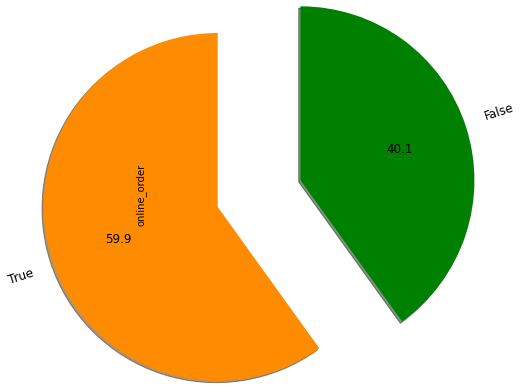

In [95]:
#is online delivery available?
colors  = ("darkorange", "green")
explodes = [0.5, 0.5]

df["online_order"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)

In [96]:
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Jayanagar
3,Kumaraswamy Layout
4,JP Nagar


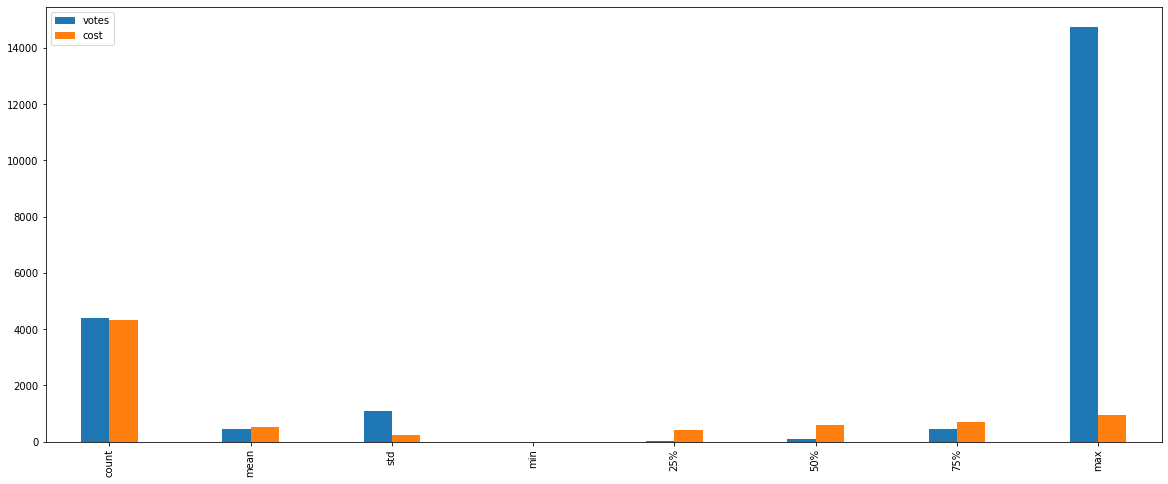

In [97]:
df.describe().plot(kind='bar',figsize=(20,8),width=(0.4))

total number of obseration is: 4377


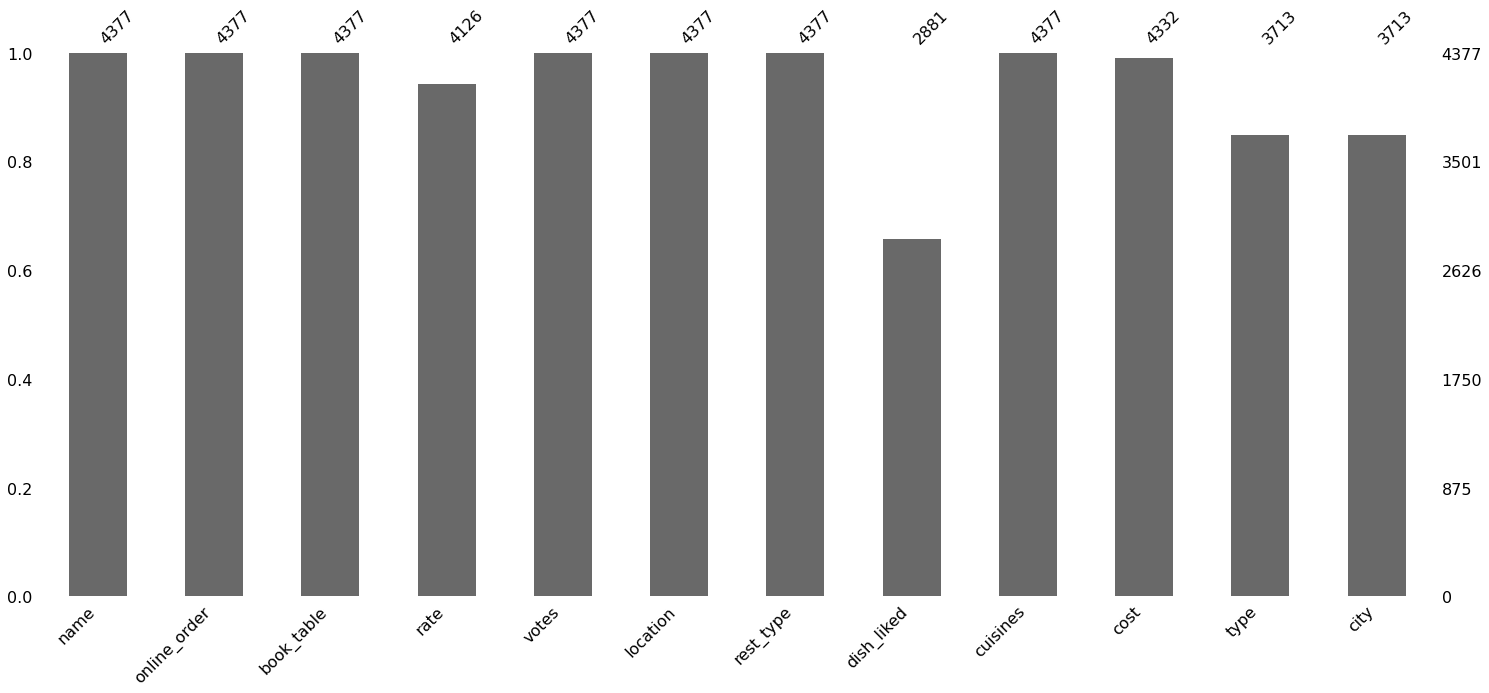

In [98]:
import missingno as msno
print ('total number of obseration is:',df.shape[0])
msno.bar(df)

In [99]:
#How many of the restuarants do not accept online orders?
accept_reject=df.groupby(['online_order'])['book_table']
accept_reject.head(4377)

0       False
1       False
2       False
3       False
4        True
        ...  
4372    False
4373    False
4374    False
4375    False
4376    False
Name: book_table, Length: 4377, dtype: bool

ValueError: ignored

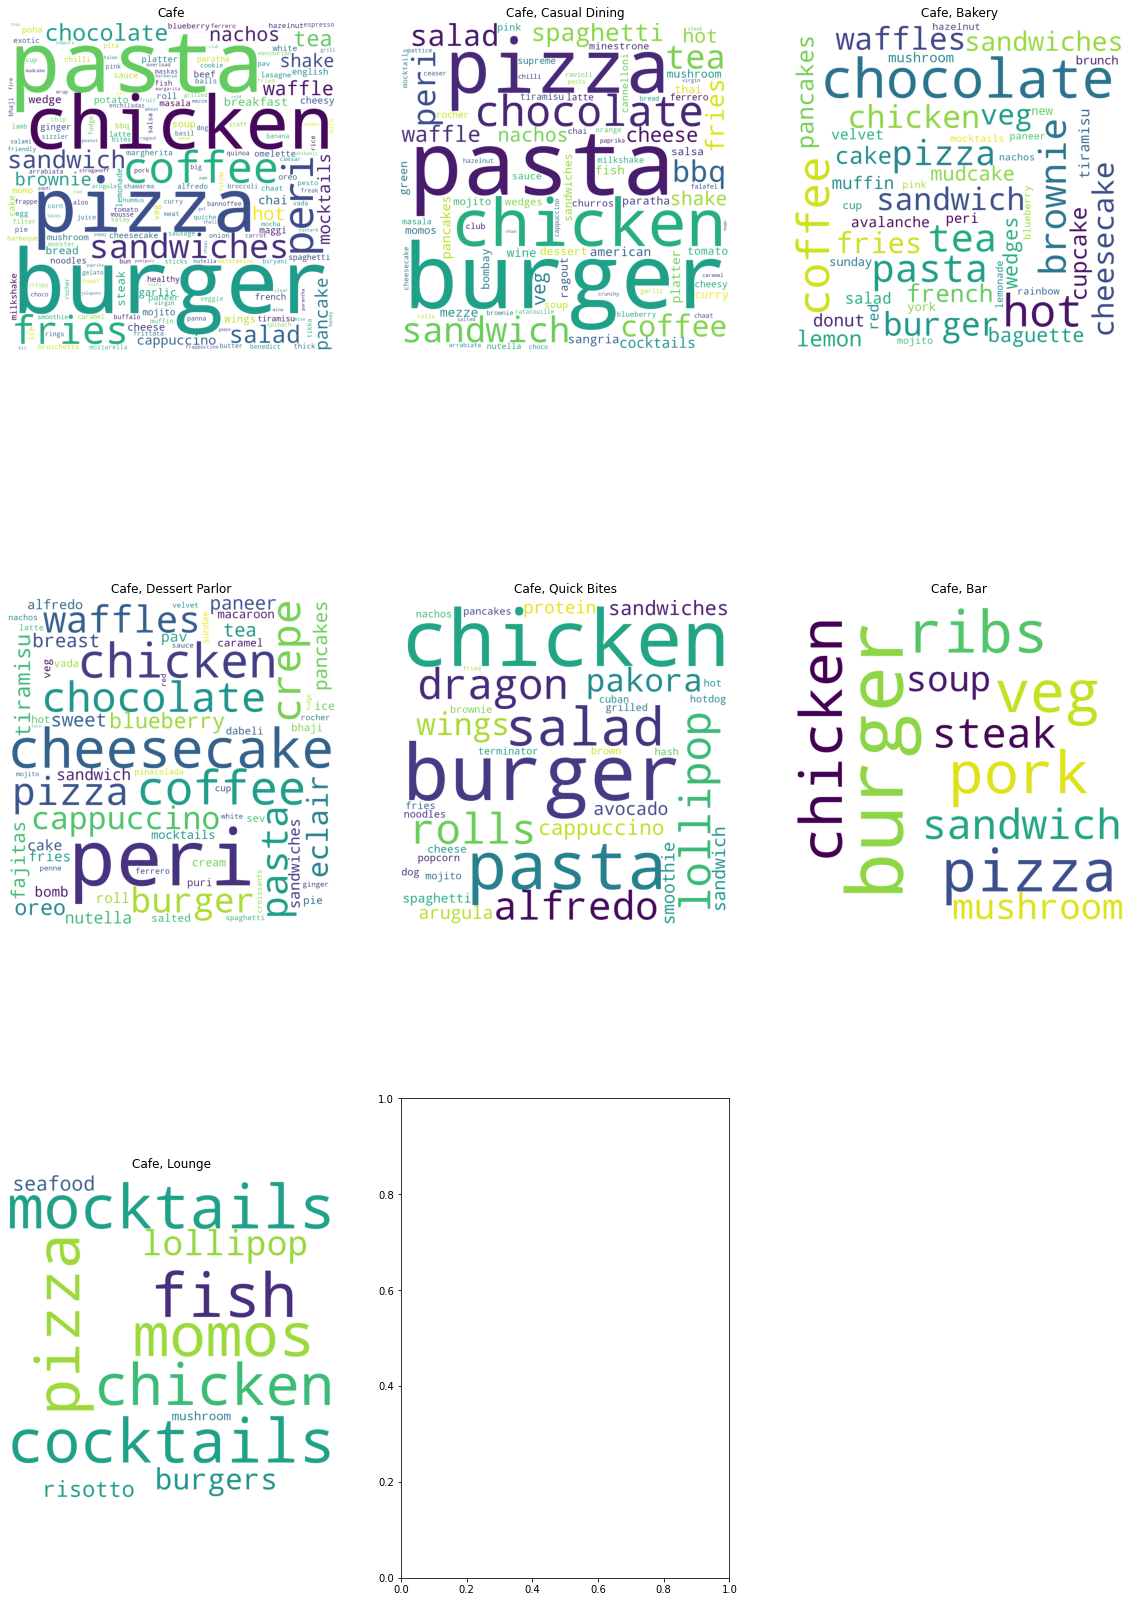

In [101]:
#WordCloud for Dishes in each Restaurant Type:
dfupd=df.copy()
dfupd['update_dish_liked']=dfupd['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
rest=dfupd['rest_type'].value_counts()[:9].index
dfupd.dropna(axis='index',subset=['rest_type'],inplace=True)
dfupd.dropna(axis='index',subset=['dish_liked'],inplace=True)
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=dfupd[dfupd['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase 
            for i in range(len(words)): 
                words[i] = words[i].lower() 
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1200, height=1200).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")
stopwords = set(STOPWORDS) 
produce_wordcloud(rest)

In [102]:
#Count of total Restaurants in each Locations:
fig=px.bar(x=df['city'].unique(),y=df['city'].value_counts(),labels=dict(x='City Name',y='Total Count'),color_continuous_scale="Agsunset",color=df['city'].unique())
fig.update_layout(title="Location wise counts for Restaurants ",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2, opacity=1)
fig.show()

ValueError: ignored

In [103]:
#Most popular cuisines of Bangalore

cuisines=df.groupby(['cuisines'])
cuisines.describe()

votes                     \
                                                   count    mean        std   
cuisines                                                                      
American, Cafe, Chinese, Italian, Desserts           8.0    0.00   0.000000   
American, Cafe, Continental, French, Burger, Me...   9.0  745.00  11.478240   
BBQ, Continental, Burger, Wraps, Pizza, Cafe        20.0  116.60   1.902906   
Bakery, Beverages, Cafe, Coffee, Desserts, Sand...   6.0    0.00   0.000000   
Bakery, Cafe                                         2.0    0.00   0.000000   
...                                                  ...     ...        ...   
North Indian, Cafe, Fast Food, Beverages            10.0  331.10   2.024846   
North Indian, South American, Cafe                  10.0    0.00   0.000000   
North Indian, South Indian, Andhra, Cafe             4.0   17.00   2.309401   
Pizza, Italian, Cafe, Burger, Finger Food, Fast...  16.0  382.25   1.000000   
Salad, Cafe, Continental, Steak, Italian, Burge...   3.0   97.00   0.000000   

                                                                         \
                                                      min    25%    50%   
cuisines                                                                  
American, Cafe, Chinese, Italian, Desserts            0.0    0.0    0.0   
American, Cafe, Continental, French, Burger, Me...  733.0  733.0  751.0   
BBQ, Continental, Burger, Wraps, Pizza, Cafe        114.0  115.0  117.0   
Bakery, Beverages, Cafe, Coffee, Desserts, Sand...    0.0    0.0    0.0   
Bakery, Cafe                                          0.0    0.0    0.0   
...                                                   ...    ...    ...   
North Indian, Cafe, Fast Food, Beverages            326.0  331.0  331.0   
North Indian, South American, Cafe                    0.0    0.0    0.0   
North Indian, South Indian, Andhra, Cafe             15.0   15.0   17.0   
Pizza, Italian, Cafe, Burger, Finger Food, Fast...  380.0  382.0  382.0   
Salad, Cafe, Continental, Steak, Italian, Burge...   97.0   97.0   97.0   

                                                                   cost  \
                                                       75%    max count   
cuisines                                                                  
American, Cafe, Chinese, Italian, Desserts            0.00    0.0   8.0   
American, Cafe, Continental, French, Burger, Me...  755.00  756.0   9.0   
BBQ, Continental, Burger, Wraps, Pizza, Cafe        118.00  119.0  20.0   
Bakery, Beverages, Cafe, Coffee, Desserts, Sand...    0.00    0.0   6.0   
Bakery, Cafe                                          0.00    0.0   2.0   
...                                                    ...    ...   ...   
North Indian, Cafe, Fast Food, Beverages            332.50  333.0  10.0   
North Indian, South American, Cafe                    0.00    0.0  10.0   
North Indian, South Indian, Andhra, Cafe             19.00   19.0   4.0   
Pizza, Italian, Cafe, Burger, Finger Food, Fast...  382.25  385.0  16.0   
Salad, Cafe, Continental, Steak, Italian, Burge...   97.00   97.0   3.0   

                                                                              \
                                                     mean  std    min    25%   
cuisines                                                                       
American, Cafe, Chinese, Italian, Desserts          400.0  0.0  400.0  400.0   
American, Cafe, Continental, French, Burger, Me...  900.0  0.0  900.0  900.0   
BBQ, Continental, Burger, Wraps, Pizza, Cafe        700.0  0.0  700.0  700.0   
Bakery, Beverages, Cafe, Coffee, Desserts, Sand...    1.0  0.0    1.0    1.0   
Bakery, Cafe                                        900.0  0.0  900.0  900.0   
...                                                   ...  ...    ...    ...   
North Indian, Cafe, Fast Food, Beverages            200.0  0.0  200.0  200.0   
North Indian, South American, Cafe        

In [105]:
#Loaction wise ratings of Restaurants:
loc_plt=pd.crosstab(df2['rating'],df2['city'])
fig=px.bar(loc_plt,x=loc_plt.index,y=loc_plt.columns,barmode='stack',opacity=1)
fig.update_layout(title="Location wise Rating",
                  titlefont={'size': 30},
                  template='simple_white'       
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=0.5, opacity=0.8)
fig.show()

KeyError: ignored

In [106]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rate             251
votes              0
location           0
rest_type          0
dish_liked      1496
cuisines           0
cost              45
type             664
city             664
dtype: int64

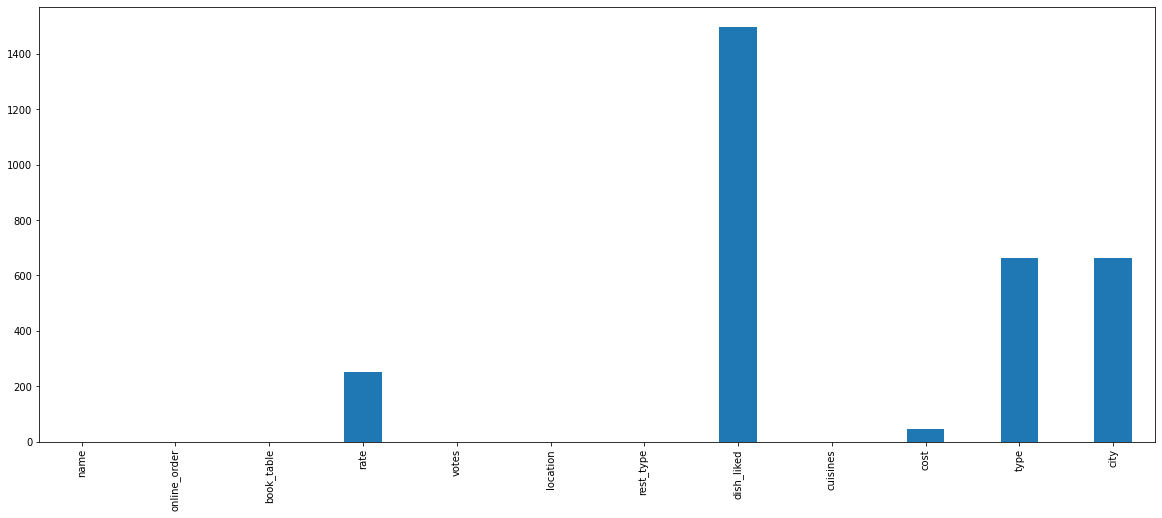

In [107]:
df.isnull().sum().plot(kind='bar',figsize=(20,8),width=(0.4))

In [108]:
df1=df.groupby('location')
df1.first()
df1.describe()


votes                                                      \
                   count        mean         std   min    25%    50%     75%   
location                                                                       
BTM                320.0  208.781250  419.961756   0.0  22.00   49.0  204.00   
Banashankari       106.0  233.566038  271.033754   0.0  75.00  144.0  324.00   
Banaswadi           50.0   36.580000   28.124425   0.0  10.00   33.0   62.75   
Bannerghatta Road  112.0   47.017857   47.387226   0.0   9.00   38.0   69.00   
Basavanagudi        42.0  224.000000  152.096086  30.0  58.00  219.0  240.75   
...                  ...         ...         ...   ...    ...    ...     ...   
Vasanth Nagar       55.0  127.545455   96.493488  19.0  35.00  153.0  255.00   
Vijay Nagar          2.0   40.500000    6.363961  36.0  38.25   40.5   42.75   
Whitefield          77.0  193.480519  292.134459   0.0  18.00   35.0  142.00   
Wilson Garden        6.0    0.000000    0.000000   0.0   0.00    0.0    0.00   
Yeshwantpur          2.0   30.000000    0.000000  30.0  30.00   30.0   30.00   

                            cost                                               \
                      max  count        mean         std    min    25%    50%   
location                                                                        
BTM                1883.0  320.0  522.968750  183.005899  200.0  400.0  500.0   
Banashankari        924.0  106.0  584.905660  179.572218  200.0  500.0  600.0   
Banaswadi            78.0   50.0  466.000000   92.272887  300.0  400.0  500.0   
Bannerghatta Road   200.0  112.0  584.375000  160.381197  300.0  400.0  600.0   
Basavanagudi        514.0   42.0  595.238095  112.515324  400.0  525.0  600.0   
...                   ...    ...         ...         ...    ...    ...    ...   
Vasanth Nagar       257.0   55.0  216.916364  218.671835    1.1    1.1  300.0   
Vijay Nagar          45.0    2.0  750.000000  212.132034  600.0  675.0  750.0   
Whitefield         1012.0   77.0  598.077922  231.124754    1.0  500.0  700.0   
Wilson Garden         0.0    6.0  566.666667  258.198890  400.0  400.0  400.0   
Yeshwantpur          30.0    2.0  400.000000    0.000000  400.0  400.0  400.0   

                                 
                     75%    max  
location                         
BTM                650.0  900.0  
Banashankari       700.0  900.0  
Banaswadi          500.0  600.0  
Bannerghatta Road  700.0  900.0  
Basavanagudi       600.0  900.0  
...                  ...    ...  
Vasanth Nagar      500.0  500.0  
Vijay Nagar        825.0  900.0  
Whitefield         700.0  900.0  
Wilson Garden      775.0  900.0  
Yeshwantpur        400.0  400.0  

[64 rows x 16 columns]

In [114]:
df=df.drop('type',axis=1)

In [115]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,city
0,San Churro Cafe,True,False,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Banashankari
1,Penthouse Cafe,True,False,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,NaN
2,Smacznego,True,False,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,Banashankari
3,CafãÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,True,False,4.1/5,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,Banashankari
4,Cafe Shuffle,True,True,4.2/5,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600.0,Banashankari


In [111]:
n = df.nunique(axis=0)
n

name            494
online_order      2
book_table        2
rate             51
votes           691
location         64
rest_type         9
dish_liked      483
cuisines        251
cost             25
type              7
city             30
dtype: int64

In [113]:
n = df.groupby('city')
n.first()
n.describe()

votes                                              \
                       count        mean          std  min    25%    50%   
city                                                                       
BTM                    261.0  422.965517  1363.533908  0.0  22.00   85.0   
Banashankari            71.0  212.042254   239.507079  0.0  60.00  144.0   
Bannerghatta Road      105.0  109.285714   169.278941  0.0  13.00   46.0   
Basavanagudi           113.0  230.106195   288.817644  0.0  50.00  144.0   
Bellandur               58.0  146.034483   235.079603  0.0  23.00   38.0   
Brigade Road           158.0  200.044304   450.526152  0.0  10.00   50.0   
Brookefield             69.0  134.753623   235.760247  0.0  14.00   40.0   
Church Street          168.0  258.988095   566.138818  0.0  10.75   66.0   
Electronic City         45.0   49.911111    50.849521  0.0   4.00   43.0   
Frazer Town            106.0  251.509434   391.747349  0.0  20.00   66.0   
HSR                     99.0  169.909091   223.476068  0.0  36.00   74.0   
Indiranagar            173.0  287.098266   462.044492  0.0  17.00   97.0   
JP Nagar               143.0  178.881119   254.928835  0.0  14.00   61.0   
Jayanagar              200.0  231.945000   346.716184  0.0  27.25   91.0   
Kalyan Nagar           106.0  130.216981   201.306542  0.0  17.00   46.0   
Kammanahalli           103.0  110.514563   158.905932  0.0  16.50   46.0   
Koramangala 4th Block  241.0  490.360996  1217.674350  0.0  26.00  138.0   
Koramangala 5th Block  188.0  407.712766   684.214013  0.0  29.50  138.0   
Koramangala 6th Block  210.0  392.966667   769.642074  0.0  26.25   93.0   
Koramangala 7th Block  236.0  378.182203   631.113522  0.0  27.75  128.0   
Lavelle Road           150.0  221.800000   488.230210  0.0  11.00   56.0   
MG Road                135.0  215.874074   504.717720  0.0  10.50   61.0   
Malleshwaram            77.0  187.519481   225.361149  0.0  20.00   72.0   
Marathahalli            60.0  100.166667   176.630627  0.0  12.00   40.0   
New BEL Road            60.0  311.816667   554.225417  0.0  18.00  120.0   
Old Airport Road        91.0  267.329670   432.785655  0.0  11.50   71.0   
Rajajinagar             44.0  143.568182   174.136861  0.0   8.00   74.5   
Residency Road         125.0  158.776000   283.647068  0.0  10.00   46.0   
Sarjapur Road           65.0  110.953846   158.354767  0.0  19.00   37.0   
Whitefield              53.0  108.471698   211.520467  0.0  14.00   25.0   

                                         cost                                 \
                          75%      max  count        mean         std    min   
city                                                                           
BTM                    400.00  14654.0  259.0  527.106950  218.779333    1.0   
Banashankari           234.00    918.0   71.0  568.309859  164.368801  200.0   
Bannerghatta Road      127.00    727.0  105.0  556.200000  158.185772    1.0   
Basavanagudi           240.00   1872.0  113.0  583.194690  181.311879    1.0   
Bellandur              128.75    894.0   58.0  507.022414  249.203907    1.0   
Brigade Road           161.50   3547.0  158.0  516.590506  252.758556    1.0   
Brookefield             72.00    819.0   69.0  440.666667  231.557874    1.0   
Church Street          256.25   3573.0  166.0  501.962048  261.159371    1.0   
Electronic City         79.00    159.0   45.0  504.444444  196.220604  100.0   
Frazer Town            362.00   1852.0  106.0  514.314151  253.283337    1.0   
HSR                    202.00    895.0   99.0  481.449495  223.947593    1.0   
Indiranagar            289.00   2654.0  167.0  512.689820  236.170972    1.0   
JP Nagar               204.00   1445.0  143.0  544.076923  174.404140    1.0   
Jayanagar              272.50   1919.0  199.0  540.479397  181.617705    1.0   
Kalyan Nagar           140.00   1181.0  106.0  538.258491  196.806707    1.0   
Kammanahalli           124.00    722.0  101.0  544.079208  174.764452    1

In [116]:
df['city'] = df['city'].fillna('Unknown City')
null=df.isna().sum()
null



name               0
online_order       0
book_table         0
rate             251
votes              0
location           0
rest_type          0
dish_liked      1496
cuisines           0
cost              45
city               0
dtype: int64

In [119]:
n = df.groupby('cost')
n.first()
n.describe()

votes                                                                  
       count         mean          std    min     25%     50%     75%      max
cost                                                                          
1.0    197.0   798.071066   999.802963    0.0     9.0   366.0  1283.0   3007.0
1.1     48.0   564.854167   900.817666    0.0    31.0    44.0   523.0   2295.0
1.2     81.0   872.493827  1033.004697  104.0   141.0   402.0   734.0   2747.0
1.3     23.0  2082.608696   982.442445  387.0  1651.0  2730.0  2733.5   2738.0
2.0      2.0    56.000000     0.000000   56.0    56.0    56.0    56.0     56.0
2.2     21.0    24.952381     0.218218   24.0    25.0    25.0    25.0     25.0
50.0     6.0    11.000000     0.000000   11.0    11.0    11.0    11.0     11.0
100.0    3.0     0.000000     0.000000    0.0     0.0     0.0     0.0      0.0
150.0   16.0    28.375000    21.347521    0.0    17.0    22.5    33.5     62.0
200.0  113.0    66.389381   104.510460    0.0     0.0    10.0    75.0    333.0
250.0   37.0    24.081081    15.451318   15.0    16.0    16.0    18.0     67.0
300.0  194.0    67.201031   153.184625    0.0     4.5    25.5    66.0    826.0
350.0   41.0    78.878049   102.964847    0.0     9.0    46.0    97.0    367.0
400.0  437.0    82.116705   156.120830    0.0     6.0    18.0    74.0    825.0
450.0  129.0   123.922481   151.841026    0.0    27.0    52.0   157.0    481.0
500.0  672.0   139.473214   201.290507    0.0    17.0    50.5   202.0   1157.0
550.0  119.0   286.689076   372.528050    0.0    24.0    50.0   521.5   1027.0
600.0  580.0   474.351724  1022.511163    0.0    45.0   118.0   315.0   7137.0
650.0  215.0   627.823256   950.426425   10.0    73.5   128.0  1208.5   3581.0
700.0  568.0   337.205986   423.396860    0.0    89.0   170.0   447.0   2451.0
750.0  126.0   629.142857   632.502202   25.0   167.0   653.0   744.0   3220.0
800.0  445.0   635.438202   779.776992    0.0   104.0   464.0   918.0   3854.0
850.0   22.0   400.500000   195.028386  220.0   294.0   295.0   604.0    715.0
900.0  231.0  1762.463203  3566.334842    0.0    32.5   733.0  1515.0  14726.0
950.0    6.0   720.333333     1.366260  719.0   720.0   720.0   720.0    723.0

In [123]:
df['cost'].median()

600.0

In [127]:
df['cost'] = df['cost'].fillna(600)
null=df.isna().sum()
null

name               0
online_order       0
book_table         0
rate             251
votes              0
location           0
rest_type          0
dish_liked      1496
cuisines           0
cost               0
city               0
dtype: int64

In [128]:
n = df.groupby('dish_liked')
n.first()
n.describe()

votes              \
                                                   count        mean   
dish_liked                                                             
Banana Cake, Ginger Tea, Samosa, Masala Chai, S...   4.0  132.250000   
Bannoffee Pie, Pasta, Sandwiches, Salsa, Sandwi...  19.0   97.578947   
Barbecue Chicken Burger, Coffee, Ice Tea, Peri ...  12.0  186.833333   
Barbeque Chicken Pizza, Paneer Pizza, Burgers, ...   3.0  803.000000   
Barbeque Chicken Pizza, Paneer Pizza, Burgers, ...   1.0  797.000000   
...                                                  ...         ...   
Watermelon Juice, Burgers, Pasta, Faluda, Fruit...   9.0  172.000000   
Wedges, Chicken Sandwich, Sandwiches, Cappuccin...   3.0  311.000000   
Wedges, Chicken Waffles, Sandwiches, Blueberry ...   4.0  583.000000   
Wedges, Maggi, Burgers, Waffles, Margherita Piz...  16.0  382.250000   
Wine, Pizza, Brownie, Pasta, Souvlaki, Tiramisu...   6.0  733.333333   

                                                                             \
                                                         std    min     25%   
dish_liked                                                                    
Banana Cake, Ginger Tea, Samosa, Masala Chai, S...  1.258306  131.0  131.75   
Bannoffee Pie, Pasta, Sandwiches, Salsa, Sandwi...  1.538968   96.0   96.00   
Barbecue Chicken Burger, Coffee, Ice Tea, Peri ...  0.389249  186.0  187.00   
Barbeque Chicken Pizza, Paneer Pizza, Burgers, ...  0.000000  803.0  803.00   
Barbeque Chicken Pizza, Paneer Pizza, Burgers, ...       NaN  797.0  797.00   
...                                                      ...    ...     ...   
Watermelon Juice, Burgers, Pasta, Faluda, Fruit...  0.000000  172.0  172.00   
Wedges, Chicken Sandwich, Sandwiches, Cappuccin...  0.000000  311.0  311.00   
Wedges, Chicken Waffles, Sandwiches, Blueberry ...  0.000000  583.0  583.00   
Wedges, Maggi, Burgers, Waffles, Margherita Piz...  1.000000  380.0  382.00   
Wine, Pizza, Brownie, Pasta, Souvlaki, Tiramisu...  1.032796  732.0  733.00   

                                                                          \
                                                      50%     75%    max   
dish_liked                                                                 
Banana Cake, Ginger Tea, Samosa, Masala Chai, S...  132.0  132.50  134.0   
Bannoffee Pie, Pasta, Sandwiches, Salsa, Sandwi...   99.0   99.00   99.0   
Barbecue Chicken Burger, Coffee, Ice Tea, Peri ...  187.0  187.00  187.0   
Barbeque Chicken Pizza, Paneer Pizza, Burgers, ...  803.0  803.00  803.0   
Barbeque Chicken Pizza, Paneer Pizza, Burgers, ...  797.0  797.00  797.0   
...                                                   ...     ...    ...   
Watermelon Juice, Burgers, Pasta, Faluda, Fruit...  172.0  172.00  172.0   
Wedges, Chicken Sandwich, Sandwiches, Cappuccin...  311.0  311.00  311.0   
Wedges, Chicken Waffles, Sandwiches, Blueberry ...  583.0  583.00  583.0   
Wedges, Maggi, Burgers, Waffles, Margherita Piz...  382.0  382.25  385.0   
Wine, Pizza, Brownie, Pasta, Souvlaki, Tiramisu...  733.0  733.75  735.0   

                                                    cost                     \
                                                   count   mean  std    min   
dish_liked                                                                    
Banana Cake, Ginger Tea, Samosa, Masala Chai, S...   4.0  200.0  0.0  200.0   
Bannoffee Pie, Pasta, Sandwiches, Salsa, Sandwi...  19.0  600.0  0.0  600.0   
Barbecue Chicken Burger, Coffee, Ice Tea, Peri ...  12.0  500.0  0.0  500.0   
Barbeque Chicken Pizza, Paneer Pizza, Burgers, ...   3.0  700.0  0.0  700.0   
Barbeque Chicken Pizza, Paneer Pizza, Burgers, ...   1.0  700.0  NaN  700.0   
...                                                  ...    ...  ...    ...   
Watermelon Juice, Burgers, Pasta, Faluda, Fruit...   9.0  650.0  0.0  650.0   
Wedges, Chicken Sandwich, Sandwiches, Cappuccin...   3.0  800.0  0.0  800.0   
W

In [133]:
df['dish_liked'] = df['dish_liked'].fillna(1)
null=df.isna().sum()
null

name              0
online_order      0
book_table        0
rate            251
votes             0
location          0
rest_type         0
dish_liked        0
cuisines          0
cost              0
city              0
dtype: int64

In [134]:
n = df.groupby('rate')
n.first()
n.describe()

votes                                                                \
        count         mean          std     min      25%      50%       75%   
rate                                                                          
-         1.0     0.000000          NaN     0.0     0.00      0.0      0.00   
2.3/5     2.0    30.000000     0.000000    30.0    30.00     30.0     30.00   
2.4 /5    3.0   128.000000     0.000000   128.0   128.00    128.0    128.00   
2.4/5     3.0   128.333333     1.154701   127.0   128.00    129.0    129.00   
2.5 /5    2.0   157.000000     0.000000   157.0   157.00    157.0    157.00   
2.5/5     4.0   135.000000    25.403412   113.0   113.00    135.0    157.00   
2.6 /5    6.0    46.000000    19.328735    18.0    31.75     55.0     61.00   
2.6/5    28.0    52.535714    46.869782    18.0    18.00     37.5     60.00   
2.7 /5    5.0    36.600000    27.180876    20.0    26.00     26.0     26.00   
2.7/5    11.0    79.636364    17.789169    26.0    85.00     85.0     85.00   
2.8 /5   28.0   109.428571    77.732413    16.0    46.00     67.0    185.00   
2.8/5    24.0    66.458333    60.973251    16.0    37.00     44.0     67.00   
2.9 /5   34.0    23.000000    19.628365     7.0    12.00     12.0     26.25   
2.9/5    32.0    19.937500    16.034112     7.0     7.00     17.0     24.00   
3.0 /5   26.0   220.576923   458.944369     6.0    11.00     29.0     60.50   
3.0/5    29.0    50.931034    32.294328     6.0    17.00     61.0     61.00   
3.1 /5   16.0    12.812500     2.713393    10.0    10.75     13.0     14.00   
3.1/5    43.0   144.255814   365.303011     7.0    10.00     13.0     56.00   
3.2 /5   52.0    44.826923   116.124970     4.0     5.75      7.0     25.00   
3.2/5    47.0    42.787234   100.392910     4.0     7.00     11.0     40.00   
3.3 /5   42.0    14.166667    23.193688     4.0     6.00      6.0      9.00   
3.3/5    44.0     9.045455     9.632683     4.0     5.00      6.0      9.00   
3.4 /5   30.0    25.100000    34.704019     6.0     7.00      9.0     29.25   
3.4/5    68.0    35.279412    37.269028     6.0     8.50     13.0     54.00   
3.5 /5   55.0    17.509091    14.199469     6.0     9.00     14.0     20.00   
3.5/5    51.0    15.686275     9.120286     6.0    10.00     14.0     20.00   
3.6 /5  123.0    53.634146    53.368541     7.0    17.00     42.0     94.00   
3.6/5   117.0    60.094017    95.840383     7.0    16.00     36.0     61.00   
3.7 /5  146.0    54.376712    51.000087     0.0    25.00     49.0     59.00   
3.7/5   213.0    68.037559    86.609504     9.0    27.00     46.0     69.00   
3.8 /5  179.0    89.324022   109.348818    11.0    25.00     63.0     94.50   
3.8/5   264.0   152.821970   209.838745    15.0    35.00     72.0    145.00   
3.9 /5  101.0   236.277228   266.359236    18.0    49.00    104.0    317.00   
3.9/5   173.0   242.497110   246.222522    19.0    74.00    144.0    315.00   
4.0 /5  171.0   366.654971   458.647863    19.0    55.00    201.0    431.00   
4.0/5   201.0   363.990050   489.310484    23.0    82.00    204.0    390.00   
4.1 /5  307.0   711.042345   806.423425    55.0   141.00    402.0    893.50   
4.1/5   267.0   496.086142   571.218520    33.0   114.50    323.0    701.00   
4.2 /5  204.0   983.833333   926.039404    50.0   401.75    619.0   1440.00   
4.2/5   239.0   608.133891   560.298921    49.0   221.00    432.0    740.00   
4.3 /5  140.0   732.664286   658.075433    72.0   167.00    657.0   1104.25   
4.3/5   124.0  1027.870968   857.428723    67.0   496.00    720.5   1236.00   
4.4 /5  112.0   691.428571   732.342726   102.0   192.00    374.5    950.00   
4.4/5    59.0   712.644068   839.476166   100.0   190.00    366.0    939.00   
4.5 /5   54.0  1915.703704  1496.477003   131.0   550.00   1879.0   3598.25   
4.5/5    40.0  1641.350000  1306.159894   197.0   546.00   1181.0   2302.00   
4.6 /5   28.0  2787.035714  2616.466765   237.0  1026.00   1308.5   3501.25   
4.6/5    23.0  1338.304348  1463.909660   228.0   233.00  

In [137]:
#Number of Restaurants based on Services:
fig=px.histogram(df['rest_type'],labels=dict(value='rest_type'))
fig.update_layout(title="Type of Services",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_color='darkorange', marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [138]:
#Count of Restaurants based on the Cost
fig=px.histogram(df['cost'],labels=dict(value='Cost Range'),nbins=10)
fig.update_layout(title="Cost of Restaurants",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_color='darkorange', marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [139]:
#Top 10 popular Restaurant Chains in Bengaluru
chains=df['name'].value_counts()[:10]
fig=px.bar(y=chains,x=chains.index,labels=dict(x='Name',y='Count'),color_continuous_scale="Agsunset",color=chains.index)
fig.update_layout(title="Most famous restaurant chains",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces( marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [140]:
df['rate'] = df['rate'].fillna(4.7)
null=df.isna().sum()
null

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
city            0
dtype: int64

In [141]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,city
0,San Churro Cafe,True,False,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Banashankari
1,Penthouse Cafe,True,False,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,Unknown City


In [142]:
df['rate'] = df['rate'].str.split('/').str[0]
df.loc[df['rate']=="NEW", 'rate'] = np.nan
df.loc[df['rate']=="-", 'rate'] = np.nan
df['rate'] =df['rate'].astype('float')

In [143]:
location_rating=df.groupby(['location'])['rate'].mean().sort_values()[-50:][:-1]
location_rating

location
Seshadripuram            3.550000
Frazer Town              3.570000
Brigade Road             3.583019
Vijay Nagar              3.600000
Kumaraswamy Layout       3.614286
BTM                      3.651636
Shanti Nagar             3.657895
Residency Road           3.658333
Banaswadi                3.677273
JP Nagar                 3.681290
Bellandur                3.718182
Kengeri                  3.722222
Bannerghatta Road        3.726596
Kammanahalli             3.756364
Banashankari             3.767308
New BEL Road             3.780000
Basavanagudi             3.783333
Yeshwantpur              3.800000
Whitefield               3.835714
Jeevan Bhima Nagar       3.840000
HSR                      3.840506
Brookefield              3.841463
Malleshwaram             3.859016
Sarjapur Road            3.867391
Kalyan Nagar             3.881250
MG Road                  3.887879
Lavelle Road             3.892000
Koramangala 6th Block    3.893137
Indiranagar              3.902390
Koram

In [144]:
location_rating.describe()

count    49.000000
mean      3.892513
std       0.203250
min       3.550000
25%       3.726596
50%       3.881250
75%       4.032667
max       4.350000
Name: rate, dtype: float64

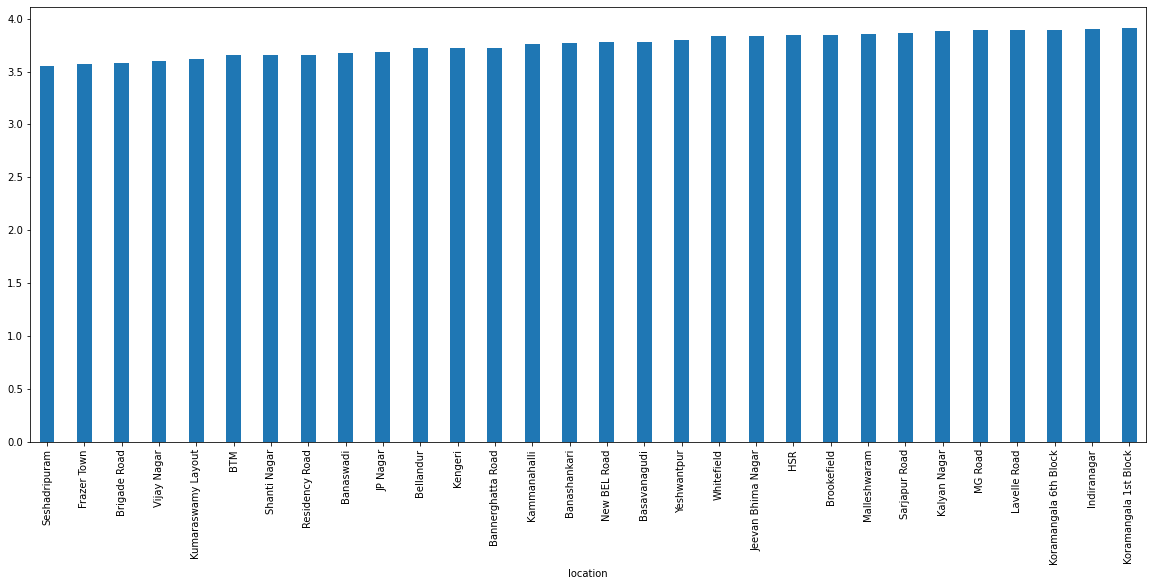

In [145]:
location_rating[:30].plot(kind='bar',figsize=(20,8),width=(0.4))